# Removing Outlier using Z-SCORE

In [537]:
import numpy as np
import pandas as pd

from scipy.stats import norm, zscore

import matplotlib.pyplot as plt
import seaborn as sns

In [538]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the size of the dataset
n_rows = 100
n_outliers = int(n_rows * 0.2)

# Generate normal data for 80% of the dataset
normal_data = {
    'Feature1': np.random.normal(50, 10, n_rows - n_outliers),
    'Feature2': np.random.normal(100, 15, n_rows - n_outliers),
    'Feature3': np.random.normal(150, 20, n_rows - n_outliers),
}

# Generate outliers for 20% of the dataset
outlier_data = {
    'Feature1': np.random.uniform(150, 200, n_outliers),
    'Feature2': np.random.uniform(250, 300, n_outliers),
    'Feature3': np.random.uniform(350, 400, n_outliers),
}

# Combine normal data and outliers using pd.concat()
data = pd.concat([pd.DataFrame(normal_data), pd.DataFrame(outlier_data)], ignore_index=True)

# Shuffle the rows to mix normal data and outliers
dataset = data.sample(frac=1, random_state=42).reset_index(drop=True)



In [539]:
dataset

,Feature1,Feature2,Feature3
0,198.132421,255.803632,358.146721
1,56.116763,107.103886,163.027825
2,53.613956,103.757393,135.392667
3,42.801558,132.856834,131.243499
4,35.214780,108.802856,122.446613
...,...,...,...
95,45.208258,103.411899,196.293171
96,65.380366,105.196723,154.329172
97,32.750822,94.118378,155.533816
98,183.009869,258.660093,372.912645


In [540]:
dataset.describe()

,Feature1,Feature2,Feature3
count,100.000000,100.000000,100.000000
mean,73.887494,133.728394,197.306352
std,51.601335,69.485838,92.051309
min,23.802549,71.218432,109.497148
25%,45.045236,92.467200,140.942616
50%,52.028624,103.907035,159.962584
75%,64.799940,122.438562,181.286976
max,198.132421,292.773029,398.059528


<Axes: >

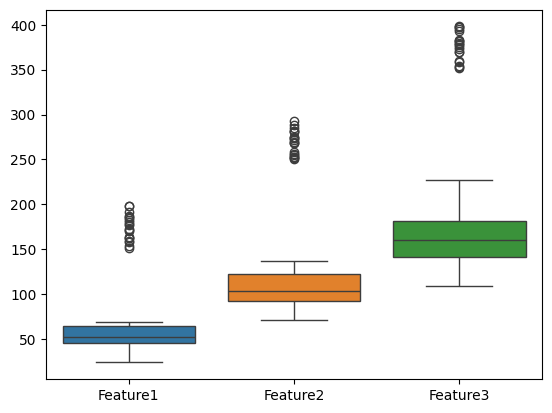

In [541]:
sns.boxplot(dataset)

In [542]:
z_score = zscore(dataset)
z_score

,Feature1,Feature2,Feature3
0,2.419915,1.765687,1.756093
1,-0.346120,-0.385095,-0.374261
2,-0.394867,-0.433498,-0.675988
3,-0.605460,-0.012606,-0.721290
4,-0.753227,-0.360521,-0.817336
...,...,...,...
95,-0.558585,-0.438495,-0.011062
96,-0.165693,-0.412680,-0.469235
97,-0.801218,-0.572916,-0.456082
98,2.125374,1.807002,1.917311


In [543]:
critical_z = norm.ppf(0.95)
critical_z

1.6448536269514722

# Trimming

In [544]:
df = dataset[z_score<critical_z].dropna()

In [545]:
df.shape

(80, 3)

<Axes: >

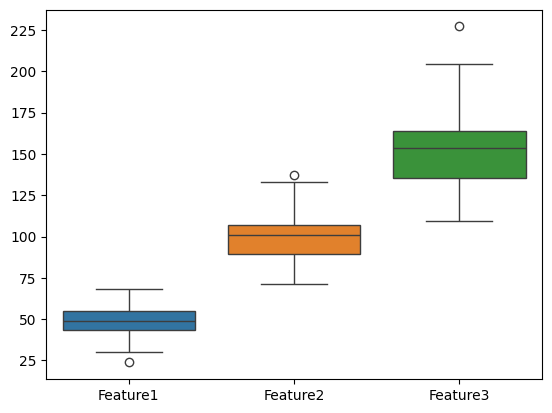

In [546]:
sns.boxplot(df)

# Caping

In [547]:
Upper_limit = dataset.mean() + critical_z*dataset.std()
lower_limit = dataset.mean() - critical_z*dataset.std()
Upper_limit, lower_limit

(Feature1    158.764137
 Feature2    248.022426
 Feature3    348.717282
 dtype: float64,
 Feature1   -10.989149
 Feature2    19.434362
 Feature3    45.895422
 dtype: float64)

In [548]:
df2 = pd.DataFrame(np.where(
    dataset > Upper_limit, Upper_limit, np.where(dataset < lower_limit, lower_limit, dataset)
))
df2.shape

(100, 3)